<a href="https://colab.research.google.com/github/jdiazram/Python_deep_Learnig_book/blob/master/Red_Neuronal_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **5.1 Precarga de datos Keras**

In [0]:
#verificar la version de tensorflow a manejar (2.x)
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
#print("GPU disponible:", tf.test.is_gpu_available())
print("GPU disponible:", tf.config.list_physical_devices('GPU')) # cambiar entorno de ejecucion con GPU

print("Version TensorFlow:",tf.__version__)

from tensorflow import keras
print("Version Keras:",tf.keras.__version__)

GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Version TensorFlow: 2.2.0-rc2
Version Keras: 2.3.0-tf


In [4]:
#cargar base de datos
mnist = tf.keras.datasets.mnist
#asignar los datos a variables de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


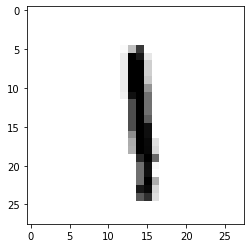

In [6]:
#ver la imagen 8 para verificacion, numero 1
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap = plt.cm.binary)

In [7]:
#etiqueta 8
print(y_train[8])

1


In [8]:
#numero de ejes
print(x_train.ndim)

3


In [9]:
#dimensiones del tensor 
print(x_train.shape)

(60000, 28, 28)


In [10]:
#tipos de datos que contiene
print(x_train.dtype)

uint8


## **5.2 Preprocesado de datos de entrada de la RN**

In [0]:
#NORMALIZACION
#tipo float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#se escalan los valores entr 0 y 1
x_train /= 255
x_test /= 255

In [12]:
#Tranformar el tensor de imagen (2d) a array 1d 
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [13]:
#codificacion one-hot
from tensorflow.keras.utils import to_categorical
#antes
print("Antes")
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)
#despues
print("Antes")
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(x_test.shape)


Antes
7
5
(60000,)
(10000, 784)
Antes
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 784)


## **5.3 Definicion del modelo**

In [0]:
#antes de tensorflow 2.0
#model = Sequential()
#model.add(Dense(10, activation = 'sigmoid', input_shape=(784,)))
#model.add(Dense(10, activation='softmax'))

#con tensorflow 2.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='sigmoid',input_shape=(784,)),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


## **5.4 configuracion del proceso de aprendizaje**

In [0]:
model.compile(
    loss="categorical_crossentropy", #funcion de costo
    optimizer = "sgd", #stocastic gradient descent
    metrics = ['accuracy'] 
)

## **5.5 Entrenamiento del modelo**

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8996 - accuracy: 0.5230
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3071 - accuracy: 0.7200
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9835 - accuracy: 0.7721
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8050 - accuracy: 0.8128
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6953 - accuracy: 0.8368


## **5.6 Evaluacion del modelo**

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.8528
Test accuracy: 0.8528000116348267
